In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import simplenn as sn
from simplenn import utils

# Modelo de Regresión Logística: `forward`

Un modelo de Regresión Logística se forma aplicando la función `Softmax` a un modelo de Regresión Lineal. De esta forma, esta función convierte a la salida de la Regresión Lineal en probabilidades.

La función de la Regresión logística es $f(x)=softmax(wx+b)$. No obstante, como hicimos con el modelo `LinearRegression`, podemos ver este modelo como la aplicación de
* Una capa `Linear` $f(x)=wx$,
* Una capa `Bias` $f(x)=x+b$
* Una capa `Softmax` $f(x)=softmax(x)$
Es decir, tenemos la siguiente secuencia de transformaciońes `x → Linear → Bias → Softmax → y`. 


Implementa el método `forward` del modelo `LinearRegression` en el archivo `simplenn/models/logistic_regression.py`. Para eso, ya definimos e inicializamos modelos internos de clase `Linear`, `Bias` y `Softmax`; solo tenés que llamar a sus `forward` respectivos en el orden adecuado.

In [2]:
x = np.array([[1,0],
             [0,1],
             [1,1]])

w = np.array([[100,0],
              [0,100]])
b = np.array([0])
linear_initializer = sn.initializers.Constant(w)
bias_initializer = sn.initializers.Constant(b)
layer=sn.LogisticRegression(2,2,linear_initializer=linear_initializer,bias_initializer=bias_initializer)
y = np.array([[1, 0],
              [0, 1],
              [0.5,0.5]
             ])

utils.check_same(y,layer.forward(x))

linear_initializer = sn.initializers.Constant(-w)
bias_initializer = sn.initializers.Constant(-b)
layer=sn.LogisticRegression(2,2,linear_initializer=linear_initializer,bias_initializer=bias_initializer)
utils.check_same(1-y,layer.forward(x))

SUCCESS :) Arrays are equal (tolerance 1e-12)
SUCCESS :) Arrays are equal (tolerance 1e-12)


# Modelo de Regresión Logística: `backward`

El método `backward` de un modelo de `LogisticRegression` es la composición *inversa* de las funciones `backward` de las capas `Linear`, `Bias`, y `Softmax`. Recordá que estas se aplican en el orden contrario al método forward.

En este caso, también te ayudamos combinando el diccionario de gradientes de cada capa en un gran diccionario único de gradientes de `LogisticRegression` utilizando el operador `**` que desarma un diccionario, con `{**dict1, **dict2}` que los vuelve a combinar.



In [26]:
samples = 100
batch_size=2
din=3 # dimensión de entrada
dout=5 # dimensión de salida
input_shape=(batch_size,din)

# Verificar las derivadas de un modelo de Regresión Logística
# con valores aleatorios de `w`, `b`, y `x`, la entrada
layer=sn.LogisticRegression(din,dout)

utils.check_gradient.common_layer(layer,input_shape,samples=samples,tolerance=1e-5)    


LogisticRegression_24 layer:
SUCCESS 2600 partial derivatives checked (100 random input samples)


# Regresión Logística aplicada

Ahora que tenemos todos los elementos, podemos definir y entrenar nuestro primer modelo regresión logística para clasificar las flores del conjunto de datos de [Iris](https://www.kaggle.com/uciml/iris).

En este caso, vamos a entrenar el modelo con la función de error cuadrático medio; no obstante, si bien esta función de error funcionará, hace el que problema de optimización no sea _convexo_ y por ende no haya un único mínimo global. Más adelante, implementaremos la función de error de _Entropía Cruzada_, diseñada específicamente para lidiar con salidas que representan distribuciones de probabilidad.

Dataset sizes: (150, 4) (150, 3)


fit:   0%|          | 0/1000 [00:00<?, ?it/s]

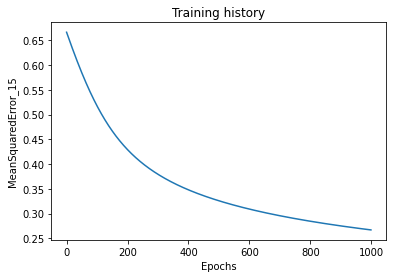

Error del modelo:
Accuracy: 0.86 (3 classes)
Confusion matrix: (rows true, columns pred)
[[50  0  0]
 [ 0 41  9]
 [ 0 12 38]]


In [47]:
import simplenn as sn
import numpy as np
from simplenn import metrics,datasets

# Cargar datos como codificación "onehot"
# y tiene tantas columnas como clases
# si el ejemplo i es de clase 2, por ejemplo, entonces
# y[i,2]=1 y el resto de los valores de y[i,:] valen 0
# (nota: las etiquetas de clase comienzan en 0)
x,y,classes=datasets.load_classification("iris",onehot=True)
# normalización de los datos
x = (x-x.mean(axis=0))/x.std(axis=0)
n, din = x.shape
n, dout = y.shape

print("Dataset sizes:", x.shape,y.shape)

#Modelo de regresión logística
model = sn.LogisticRegression(din,dout)
# Error cuadrático medio
error = sn.MeanError(sn.SquaredError())
optimizer = sn.StochasticGradientDescent(lr=0.001,epochs=1000,batch_size=32)

# Algoritmo de optimización
history = optimizer.optimize(model,x,y,error)
sn.plot.plot_history(history,error_name=error.name)


print("Error del modelo:")
y_pred=model.forward(x)
metrics.classification_summary_onehot(y,y_pred)
#sn.plot.regression1d_predictions(y,y_pred_labels)